# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import os
import string

In [2]:
comments = pd.read_csv(r'Youtube_project/UScomments.csv', error_bad_lines=False)

C:\Users\castr\AppData\Local\Temp\ipykernel_3804\1182139725.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r'Youtube_project/UScomments.csv', error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\castr\AppData\Local\Temp\ipykernel_3804\1182139725.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'Youtube_project/UScomments.csv', error_bad_lines=False)


# Exploratory Data Analysis

In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
comments.dropna(inplace=True)

In [6]:
df = comments[0:1000]

In [7]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [8]:
print(polarity[0:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, 0.2, -0.023333333333333352, 0.5, 0.0, 0.8, -0.2916666666666667, 0.0, 0.25, -0.8, 0.0, 0.0, 0.65, 0.0, 0.375, 0.0, 0.0, 0.5, -0.04999999999999999, 0.34448051948051944, 0.5, 0.6, 0.0, 0.0, -0.30625, 0.28828125, -0.36458333333333337, 0.5, 0.012499999999999997, 0.11904761904761905, 0.16666666666666666, 0.0, -0.4, -0.125, -0.07142857142857142, 0.40727272727272723, 0.0, 0.35, 0.0, -0.03415584415584416]


In [9]:
comments['polarity'] = polarity
comments.head(15)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [10]:
comments_positive = comments[comments['polarity'] == 1]

In [11]:
comments_negative = comments[comments['polarity'] == -1]

In [12]:
total_negative_comments = ''.join(comments_negative['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

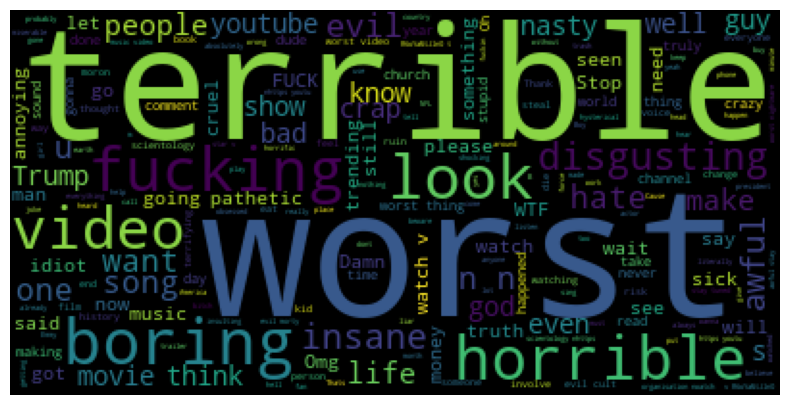

In [13]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')


In [14]:
total_positive_comments = ''.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

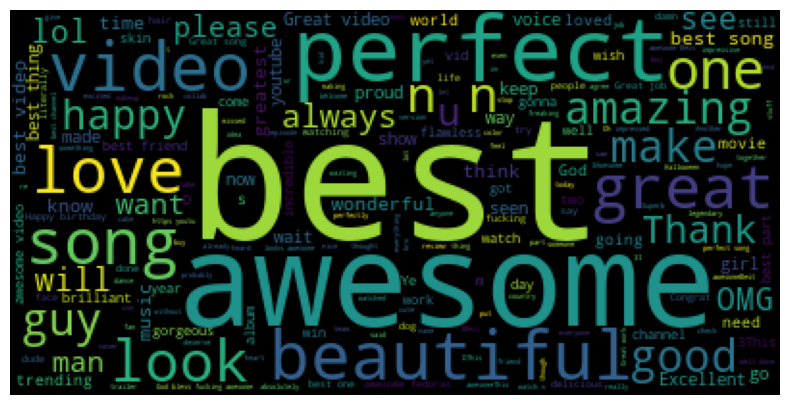

In [15]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')

# Collecting entire data of Youtube

In [16]:
path = r'Youtube_project\additional_data'

In [17]:
files_csv = os.listdir(path)

In [18]:
full_df = pd.DataFrame()

for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', error_bad_lines=False)
    current_df['country'] = file.split('.')[0][0:2]
    full_df = pd.concat([full_df, current_df])

C:\Users\castr\AppData\Local\Temp\ipykernel_3804\199599199.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', error_bad_lines=False)
C:\Users\castr\AppData\Local\Temp\ipykernel_3804\199599199.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', error_bad_lines=False)
C:\Users\castr\AppData\Local\Temp\ipykernel_3804\199599199.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', error_bad_lines=False)
C:\Users\castr\AppData\Local\Temp\ipykernel_3804\199599199.py:4: FutureWarning: The error_bad_lines argument has

In [19]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA


In [20]:
full_df.shape

(375942, 17)

# Analysing the most liked categories

In [21]:
full_df['category_id']

0        10
1        23
2        23
3        24
4        10
         ..
40944    15
40945    22
40946    24
40947     1
40948    20
Name: category_id, Length: 375942, dtype: int64

In [22]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [23]:
category_df = pd.read_csv('Youtube_project/category_file.txt',sep=':')

In [24]:
category_df.reset_index(inplace = True)
category_df

,index,Category_id Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [25]:
category_df.columns = ['category_id', 'category_name']
category_df

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [26]:
category_df.set_index('category_id', inplace = True)
category_df

,category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [27]:
category_dict = category_df.to_dict()

In [28]:
full_df['category_name'] = full_df['category_id'].map(category_dict['category_name'])

In [29]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [30]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

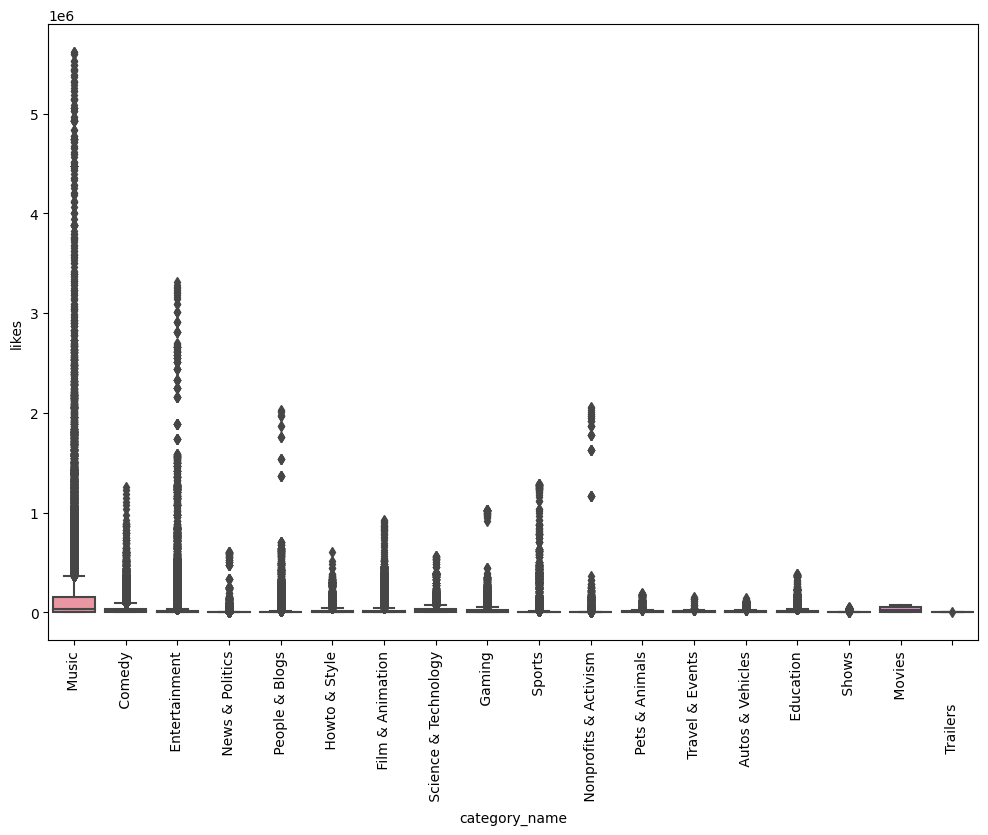

In [31]:
plt.figure(figsize =(12, 8))
sns.boxplot(x = 'category_name', y = 'likes', data = full_df)
plt.xticks(rotation = 'vertical')

# Is Audience engaged or not?

In [32]:
full_df['likes_rate'] = (full_df['likes'] / full_df['views']) * 100
full_df['dislikes_rate'] = (full_df['dislikes'] / full_df['views']) * 100
full_df['comment_count_rate'] = (full_df['comment_count'] / full_df['views']) * 100

In [33]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,likes_rate,dislikes_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

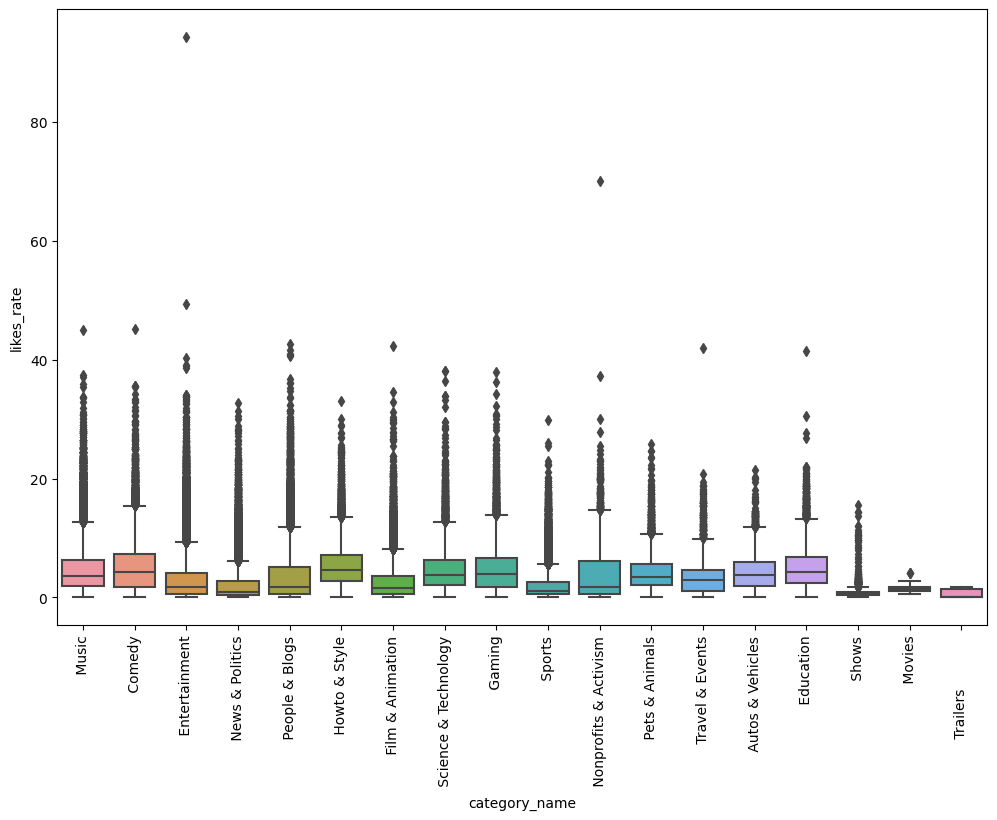

In [34]:
plt.figure(figsize =(12, 8))
sns.boxplot(x = 'category_name', y = 'likes_rate', data = full_df)
plt.xticks(rotation = 'vertical')

<AxesSubplot: xlabel='views', ylabel='likes'>

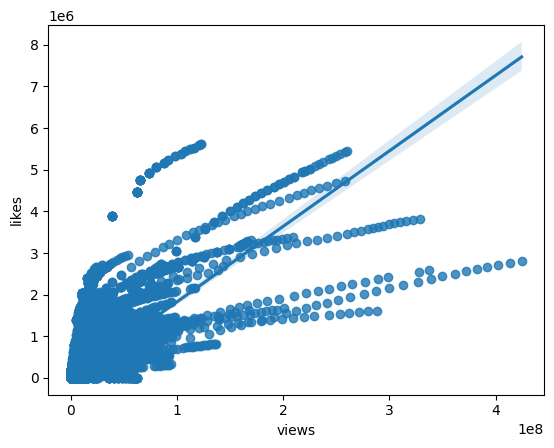

In [35]:
sns.regplot(data = full_df, x = 'views', y = 'likes')

In [36]:
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.777796,0.421653
likes,0.777796,1.000000,0.453710
dislikes,0.421653,0.453710,1.000000


<AxesSubplot: >

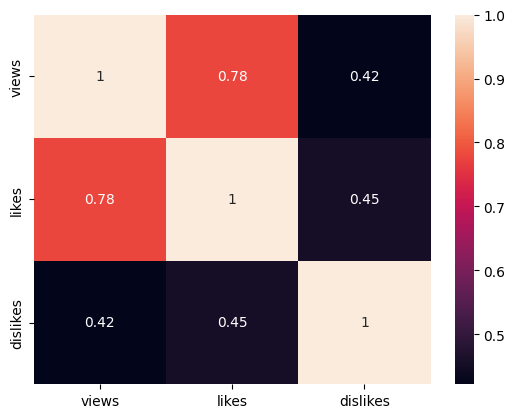

In [37]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot = True)

# Analizing trending videos

In [38]:
cdf = full_df.groupby("channel_title")['video_id'].count().sort_values(ascending = False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [39]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [40]:
px.bar(data_frame = cdf[0:20], x = 'channel_title', y = 'total_videos')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'channel_title=%{x}<br>total_videos=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['The Late Show with Stephen Colbert', 'WWE',
                          'Late Night with Seth Meyers', 'VikatanTV', 'TheEllenShow',
                          'Jimmy Kimmel Live', 'The Tonight Show Starring Jimmy Fallon',
                          'PewDiePie', 'RadaanMedia', 'The Late Late Show with James Corden',
                          'CNN', 'Netflix', 'FBE', 'MLG Highlights', 'SET India',
                          'Screen Junkies', 'ESPN', 'Marvel Entertainment', 'BuzzFeedVideo',
                          'Warner Bros. Pictures'], dtype=object),
              'xaxis': 'x',
              'y': array([984, 804, 773, 763, 743, 707, 705, 652, 651, 583, 579, 566, 555, 549,
                          528, 494, 486, 482, 481, 470], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'channel_title'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'total_videos'}}}
})

# Does punctuations have an impact on views, likes and dislikes comments?

In [41]:
def punc_count(x):
   return len ([c for c in x if c in string.punctuation])

In [42]:
sample = full_df[0:10000]

In [43]:
sample['count_punc'] = sample['title'].apply(punc_count)

C:\Users\castr\AppData\Local\Temp\ipykernel_3804\1766437736.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
sample.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,likes_rate,dislikes_rate,comment_count_rate,count_punc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,6.309630,0.094903,0.835851,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,4.874563,0.062887,0.253752,3


<AxesSubplot: xlabel='count_punc', ylabel='views'>

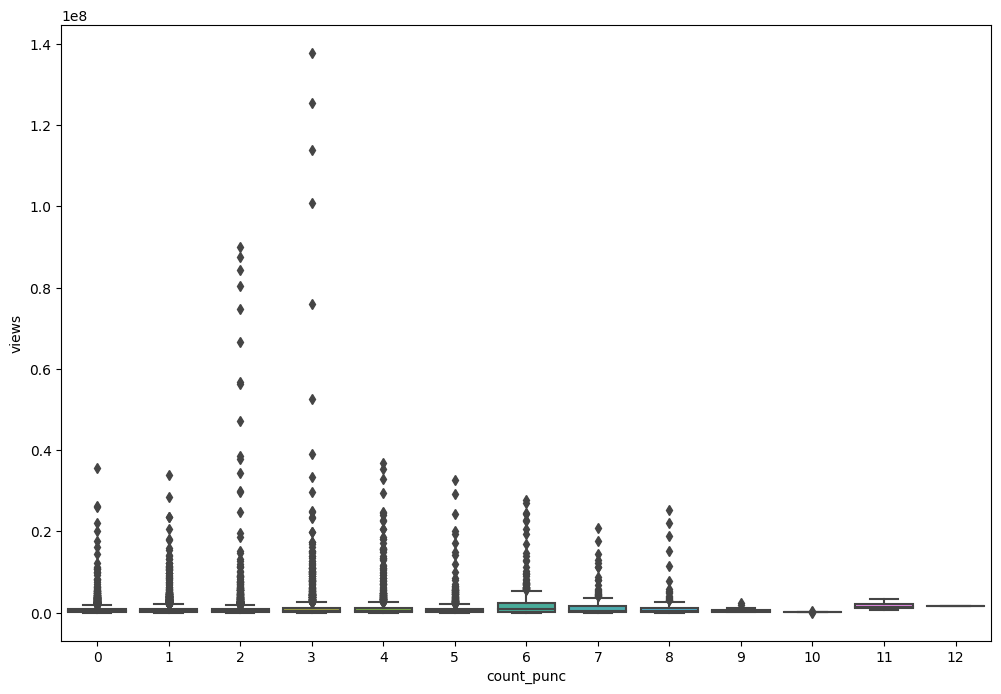

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'count_punc', y = 'views', data = sample)

In [46]:
sample['count_punc'].corr(sample['views'])

0.06510009783044858